### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
import warnings
warnings.filterwarnings('ignore')
import os

### READING THE DATASET

In [2]:
path=os.getcwd()
df=pd.read_csv(path+r'\Country-data.csv')

### GENERAL CHECKS ON DATA

In [3]:
df.head() #printing the top 5 rows in the dataframe

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.shape #shape of dataframe

(167, 10)

In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
df.isnull().sum() #calculating the null values in the dataframe

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
df_quant=df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]

### CHECKING FOR OUTLIERS

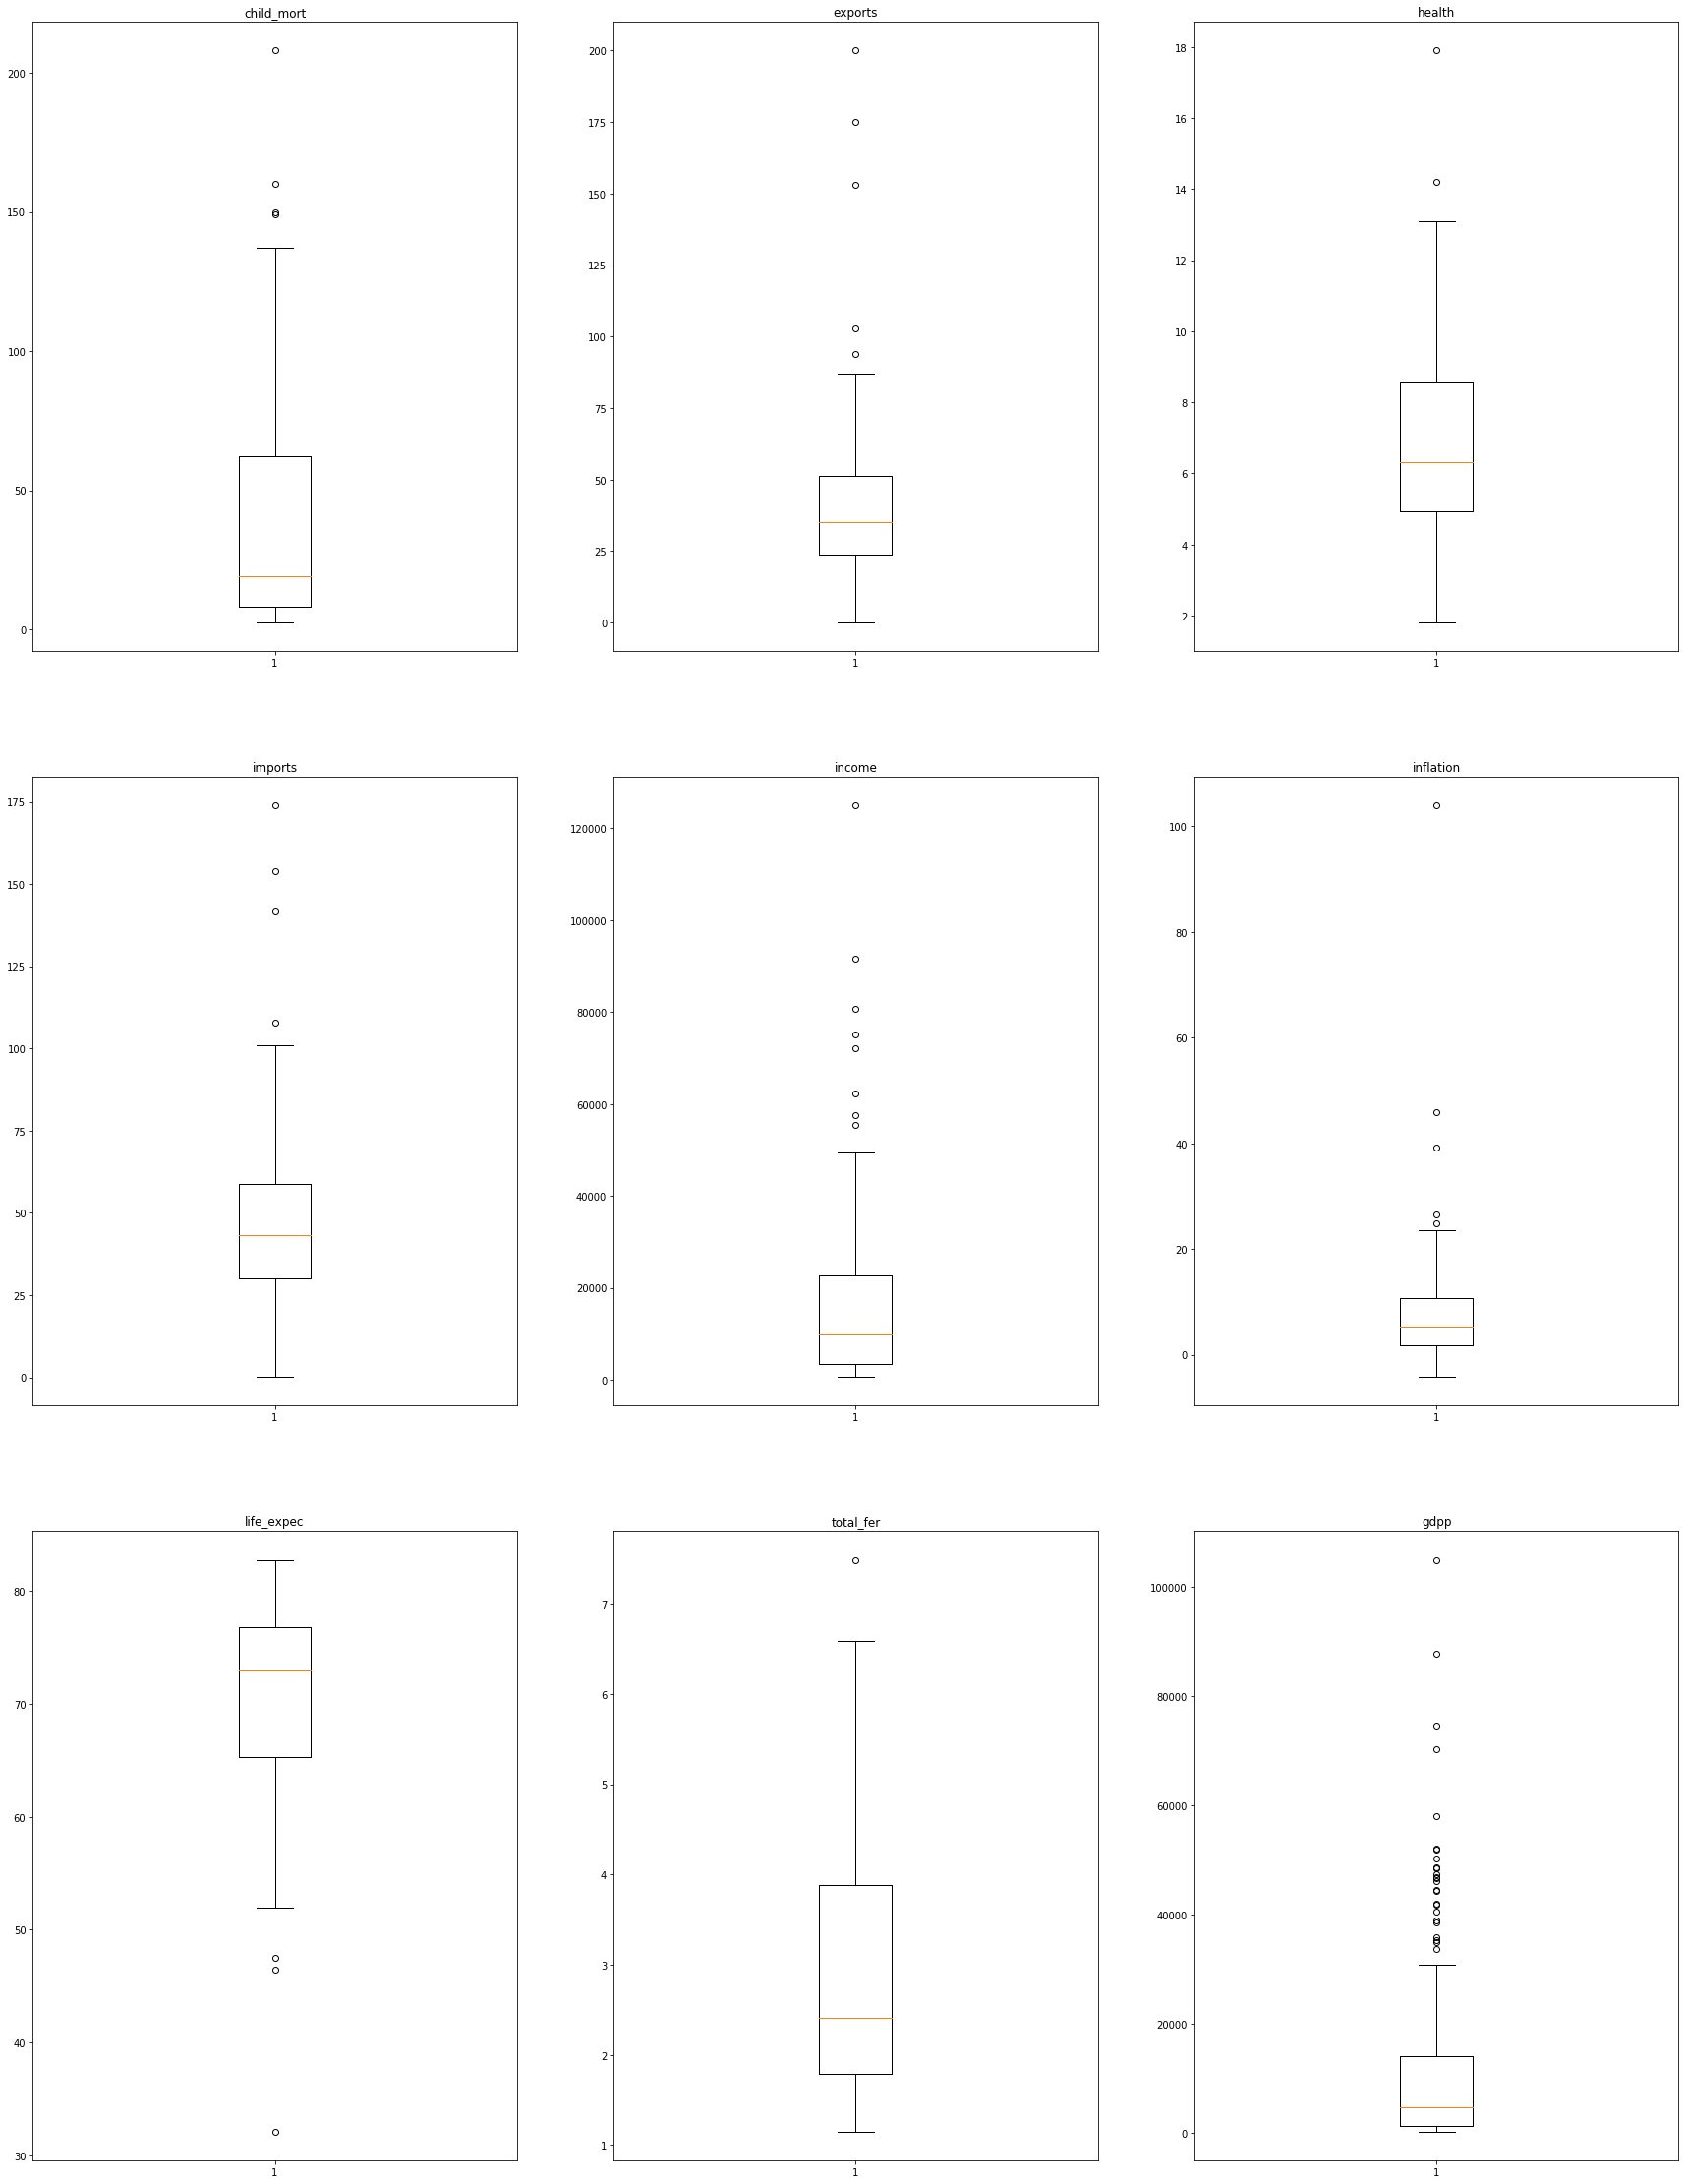

In [10]:
cols=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize=(30,40))
j=1
for i in cols:
    plt.subplot(3,3,j)
    plt.boxplot(df[i])
    plt.title(i)
    j=j+1

<p style="font-family: Arial; font-size:1.0em;color:blue;">  We can observe some outliers in the above graphs, but as the data in the dataframe is very limited, we don't eliminate the  outliers. Infact, when the clustering is performed, there is a chance that all the ouliers may be clustered into one.

### STANDARDIZING THE VALUES

<p style="font-family: Arial; font-size:1.0em;color:blue;">Scaling is an important step in the data pre-processing of the model. It helps us in analysing the data more easily. Since, the range of features vary widely, scaling is used to limit or set the values in a certain range. This helps us in analysing the data better because all the features has the values in certain range<br>Standard Scaling  transforms the data in a way that the mean of the data will be 0 with standard deviation 1.

In [11]:
scaler=StandardScaler() #standardization
df_scaled=scaler.fit_transform(df[cols])
df_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [12]:
df_scaled=pd.DataFrame(df_scaled)
df_scaled.columns=cols

In [13]:
df_scaled.head() #printing the top 5 rows of the standardized dataframe

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### PRINCIPAL COMPONENT ANALYSIS (PCA)

<p style="font-family: Arial; font-size:1.0em;color:blue;">Principal component analysis (PCA) is a method for reducing the dimensionality of large datasets for increasing interpretability of the model with minimal loss of information.

In [14]:
pca=PCA(random_state=42) #performing PCA
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
pca.components_ # PCA components

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [16]:
pca.explained_variance_ratio_ #percentage of variance explained by each feature

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

<BarContainer object of 9 artists>

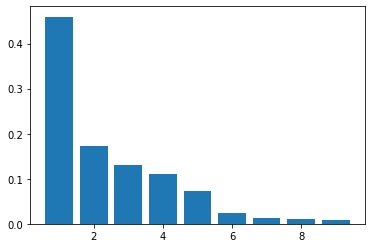

In [17]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_) #plotting the variance explained by each feature

<p style="font-family: Arial; font-size:1.0em;color:blue;"> For selecting the principal components,we find the variance explained by each feature and then find their cumulative sum . This helps us in selecting only the features which explain most of the variance rather than consiering even the features which are not important.

In [18]:
cumsum=np.cumsum(pca.explained_variance_ratio_) #cumulative sum of variances

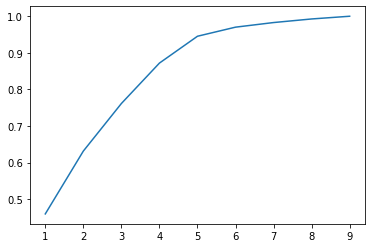

In [19]:
plt.plot(range(1,len(cumsum)+1),cumsum) #plotting the cummulative variances to find the principal components

In [20]:
cumsum

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
       0.97015232, 0.98275663, 0.99256944, 1.        ])

<p style="font-family: Arial; font-size:1.0em;color:blue;"> From the above graph, we observed that 5 features explain more than 94.5 percent of data. So, we consider 5 features as Principal Components

In [21]:
pca=PCA(n_components=5,random_state=42) # performing PCA with 5 components
df_pca=pca.fit_transform(df_scaled)

In [22]:
df_pca.shape

(167, 5)

In [23]:
df_pca=pd.DataFrame(df_pca,columns=['feature-1','feature-2','feature-3','feature-4','feature-5'])

In [24]:
df_pca.head() #top 5 rows  of dataframe

,feature-1,feature-2,feature-3,feature-4,feature-5
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007


<p style="font-family: Arial; font-size:1.0em;color:blue;"> The above dataframe has the 5 principal components

### HOPKINS SCORE

<p style="font-family: Arial; font-size:1.0em;color:blue;">Before evaluating the clustering performance, we have to make sure that the data we which will be clustered has clustering tendency and does not contain uniformly distributed points is very important. Hopkins statistic is a measure of clustering tendency. This tells us if the data is suitable for clustering or not. This score varies from 0 to 1. Hopkins statistic is a measure of clustering tendency. This tells us if the data is suitable for clustering or not. This score varies from 0 to 1.<br>If the score is close to 0, that means the data is not suitable for clustering.<br>If the score is close to 1, that means the data is suitable for clustering.


In [25]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [26]:
hopkins(df_pca) # hopkins score on the dataframe with principal components

0.7969941478198685

<p style="font-family: Arial; font-size:1.0em;color:blue;"> As the score is 0.855, it indicates that the dataframe is good for clustering.

### CLUSTERING

<p style="font-family: Arial; font-size:1.0em;color:blue;"> Clustering is a unsupervised machine learning technique which is used to find the patterns in the data and helps in grouping the datapoints into various clusters. All the datapoints in the same cluster are said to be very similar when compared to the ones in other clusters.<br><br>
</p>    
<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
For this business proble, we will perform two types of clustering techniques.<br>
1. K Means Clustering<br>
2. Hierarchial Clustering<br>

### K-MEANS CLUSTERING

<p style="font-family: Arial; font-size:1.0em;color:blue;"> The k-means algorithm is the process of grouping the datapoints into k clusters such that the objects in a cluster are more similar to each other than to objects in different clusters. We will select the number of clusters k based on the sum of sqaure value or the silhouette score.

For 2 clusters, the silhouette score is 0.3044199499231817
For 3 clusters, the silhouette score is 0.3079769786519015
For 4 clusters, the silhouette score is 0.3263683385174537
For 5 clusters, the silhouette score is 0.3332587117271835
For 6 clusters, the silhouette score is 0.2599661724540479
For 7 clusters, the silhouette score is 0.27412281958499446
For 8 clusters, the silhouette score is 0.24892086117288711
For 9 clusters, the silhouette score is 0.24508705596048988
For 10 clusters, the silhouette score is 0.2461721408753482
For 11 clusters, the silhouette score is 0.23833881640908758
For 12 clusters, the silhouette score is 0.236396122105971
For 13 clusters, the silhouette score is 0.2296229139017313
For 14 clusters, the silhouette score is 0.21852420442889842


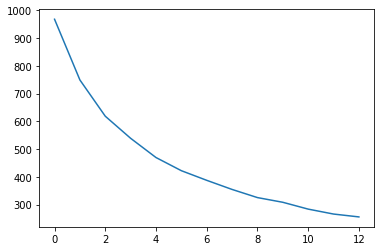

In [27]:
ssd=[]
silhouette=pd.DataFrame(columns=['no.of clusters','silhouette'])
for i in range(2,15):
    kmeans=KMeans(i,max_iter=100,random_state=42)     # performing kmeans clustering algorithm
    kmeans.fit(df_pca)
    ssd.append(kmeans.inertia_)
    cluster_labels=kmeans.labels_     #appending the value of inertia in the ssd list
    sil=silhouette_score(df_pca,cluster_labels)
    silhouette=silhouette.append({'no.of clusters':i,'silhouette':sil} , ignore_index=True)
    print('For',i,'clusters, the silhouette score is', sil)
plt.plot(ssd)

<p style="font-family: Arial; font-size:1.0em;color:blue;"> From the above Elbow curve, we can consider 4 or 5 as the number of clusters. We will also plot silhouette score for more understanding.

### SILHOUETTE SCORE

<p style="font-family: Arial; font-size:1.0em;color:blue;">The silhouette value is a measure of similarity of a data point in its own cluster (cohesion) compared to that of other clusters (separation).<br> The silhouette score ranges from −1 to +1.<br> When the silhouette score is high, that means the data point is similar to its own cluster and is poorly matched to other neighbouring clusters.

In [28]:
silhouette 

,no.of clusters,silhouette
0,2.0,0.304420
1,3.0,0.307977
2,4.0,0.326368
3,5.0,0.333259
4,6.0,0.259966
5,7.0,0.274123
6,8.0,0.248921
7,9.0,0.245087
8,10.0,0.246172
9,11.0,0.238339


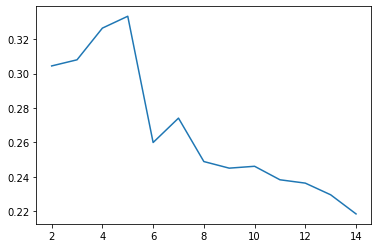

In [29]:
plt.plot(silhouette['no.of clusters'],silhouette['silhouette']) # plotting the silhouette score for the corresponding number of clusters

<p style="font-family: Arial; font-size:1.0em;color:blue;"> From the above graph, we can determine that the silhouette score is highest when the the number of clusters is 5.

In [30]:
kmeans=KMeans(n_clusters=5,max_iter=100,random_state=42) #performing kmeans 5 clusters
kmeans.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [31]:
kmeans.inertia_

539.4300513083451

In [32]:
cluster_labels=kmeans.labels_ # assigning the clsuter id's 

In [33]:
set(cluster_labels)

{0, 1, 2, 3, 4}

In [34]:
df_kmeans=df_pca.copy()
df_kmeans['kmeans_cluster_number']=cluster_labels

In [35]:
df['kmeans_cluster_number']=cluster_labels #adding kmeans cluster labels column in the original dataframe

Text(0.5, 0.95, 'Scatterplot of Principal components')

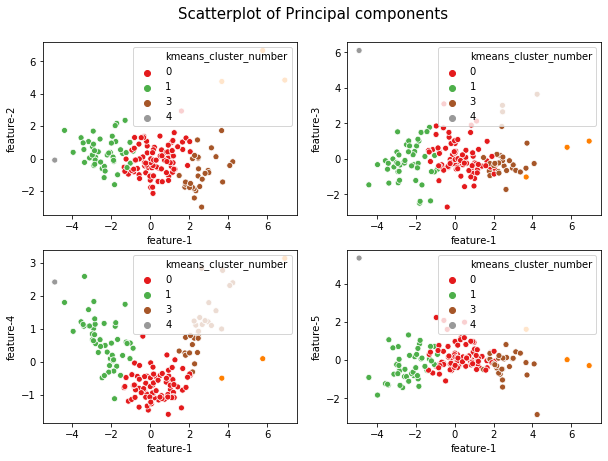

In [36]:
plt.figure(figsize=(10,7))
j=1
kmeans_cols=['feature-2','feature-3','feature-4','feature-5']
for i in kmeans_cols:
    plt.subplot(2,2,j)
    sns.scatterplot(df_kmeans['feature-1'],df_kmeans[i],hue=df_kmeans['kmeans_cluster_number'],palette="Set1")
    j+=1
plt.suptitle("Scatterplot of Principal components",y=0.95,fontsize=15)

In [37]:
df_scaled['kmeans_cluster_number']=cluster_labels
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_number
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0


Text(0.5, 0.95, 'Scatterplot of original features')

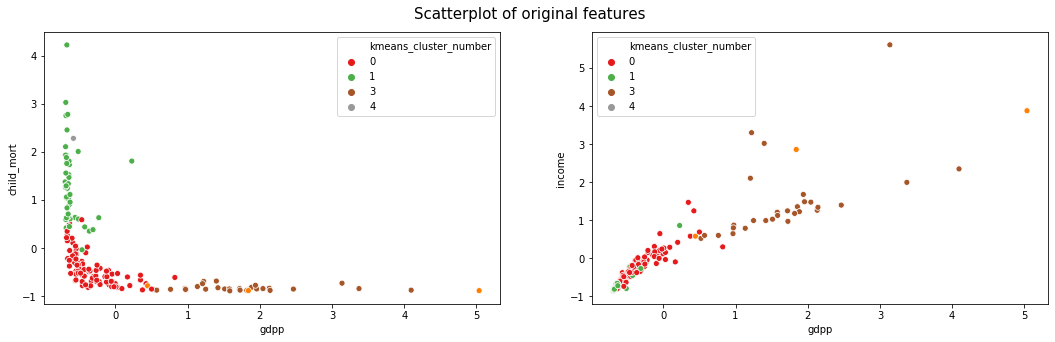

In [38]:
col=['child_mort','income']
plt.figure(figsize=(18,5))
j=1
for i in col:
    plt.subplot(1,2,j)
    sns.scatterplot(df_scaled['gdpp'],df_scaled[i],hue=df_scaled['kmeans_cluster_number'],palette="Set1")
    j+=1
plt.suptitle("Scatterplot of original features",y=0.95,fontsize=15)

Text(0.5, 0.95, 'Scatterplot of original features')

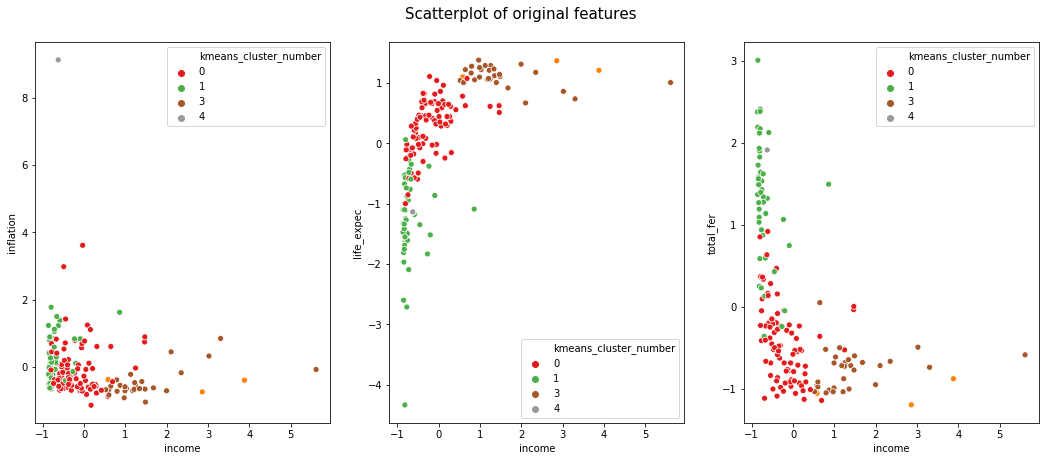

In [39]:
c=['inflation','life_expec', 'total_fer']
plt.figure(figsize=(18,7))
j=1
for i in c:
    plt.subplot(1,3,j)
    sns.scatterplot(df_scaled['income'],df_scaled[i],hue=df_scaled['kmeans_cluster_number'],palette="Set1")
    j+=1
plt.suptitle("Scatterplot of original features",y=0.95,fontsize=15)

<p style="font-family: Arial; font-size:1.0em;color:blue;"> The above plots depict that the clusters are well seperated and are very concise.

Text(0.5, 0.95, 'GDP, Income and Child mortality plot for all the clusters')

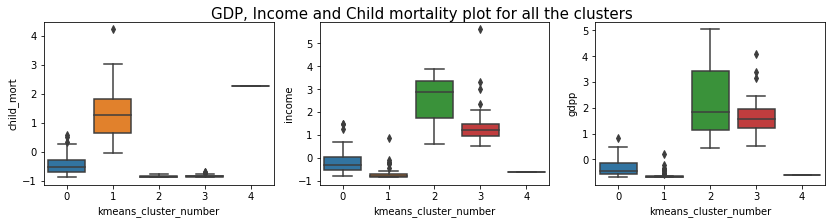

In [40]:
plt.figure(figsize=(14,3))
j=1
col=['child_mort','income','gdpp']
for i in col:
    plt.subplot(1,3,j)
    sns.boxplot(y=df_scaled[i],x=df_scaled['kmeans_cluster_number'])
    j=j+1
plt.suptitle("GDP, Income and Child mortality plot for all the clusters",y=0.95,fontsize=15)

<p style="font-family: Arial; font-size:1.0em;color:blue;"> From the above boxplots, we can say that for the clusters 1 and 4, the child mortality is high, gdp is low and the net income is low which is the ideal conidtion for the countries that are in dire need for devolopment

<p style="font-family: Arial; font-size:1.0em;color:blue;"> Now, we determine the number of countries in both the  countries

In [41]:
df_scaled[df_scaled['kmeans_cluster_number']==1].shape

(47, 10)

In [42]:
df_scaled[df_scaled['kmeans_cluster_number']==4].shape

(1, 10)

<p style="font-family: Arial; font-size:1.0em;color:blue;"> We observed that the nummber of countries in cluster 1 are 47 and there is only one country in cluster 4.<br>So, apart from the country in cluster 4,we will  concentrate on the countries in cluster 1 to target the ccountries  which are in need of help!

In [43]:
df_scaled.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp', 'kmeans_cluster_number'],
      dtype='object')

### HIERARCHIAL CLUSTERING

<p style="font-family: Arial; font-size:1.0em;color:blue;"> Hierarchical clustering is a clustering technique that successively combines the clusters based on similarity until only one group is remaining. Here we will use euclidean distance as the metric to combine the groups and will perform both SINGLE and COMPLETE linkages

In [44]:
df_hierarchy=df_pca.copy()

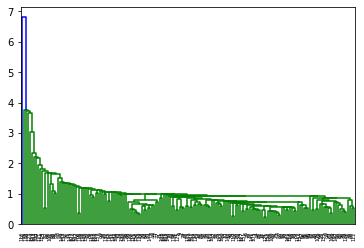

In [45]:
mergings=linkage(df_hierarchy,method='single',metric='euclidean') #performing hierarchial clustering with single linkage
dendrogram(mergings)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;"> As the dendrogram doesn't look stable, we now verify if complete Linkage menthod gives better results.

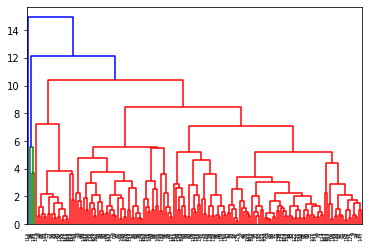

In [46]:
mergings=linkage(df_hierarchy,method='complete',metric='euclidean') #performing hierarchial clustering with complete linkage
dendrogram(mergings)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;"> From the above figure, we can say that the complete linkage provides better results and visualizations than the single linkage method. Thus, we consider this and go ahead with the cluster modelling.

In [47]:
cluster_labels = cut_tree(mergings, n_clusters=6).reshape(-1, )

In [48]:
df_hierarchy['hierarchial_cluster_number']=cluster_labels

In [49]:
df_hierarchy.head()

,feature-1,feature-2,feature-3,feature-4,feature-5,hierarchial_cluster_number
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,0
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,1
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,1
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,0
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,1


Text(0.5, 0.95, 'Scatterplot of Principal components')

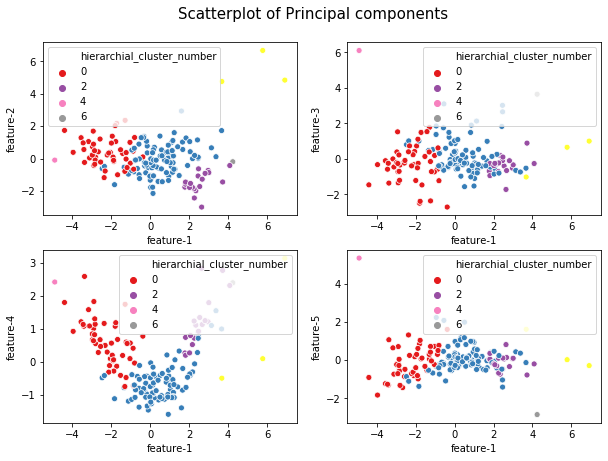

In [50]:
plt.figure(figsize=(10,7))
j=1
hierarchy_cols=['feature-2','feature-3','feature-4','feature-5']
for i in hierarchy_cols:
    plt.subplot(2,2,j)
    sns.scatterplot(df_hierarchy['feature-1'],df_hierarchy[i],hue=df_hierarchy['hierarchial_cluster_number'],palette="Set1")
    j+=1
plt.suptitle("Scatterplot of Principal components",y=0.95,fontsize=15)

In [51]:
df['hierarchial_cluster_number']=cluster_labels # assigning the hierarchial cluster id's to the dataframe

In [52]:
df_scaled['hierarchial_cluster_number']=cluster_labels

In [53]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_number,hierarchial_cluster_number
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1


In [54]:
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_number,hierarchial_cluster_number
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1,0
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0,1
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0,1
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1,0
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0,1


In [55]:
df_pca[['kmeans_cluster_number','hierarchial_cluster_number']]=df[['kmeans_cluster_number','hierarchial_cluster_number']]

In [56]:
df_pca.head()

,feature-1,feature-2,feature-3,feature-4,feature-5,kmeans_cluster_number,hierarchial_cluster_number
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,1,0
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0,1
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,0,1
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,1,0
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,0,1


Text(0.5, 0.95, 'Scatterplot of original features')

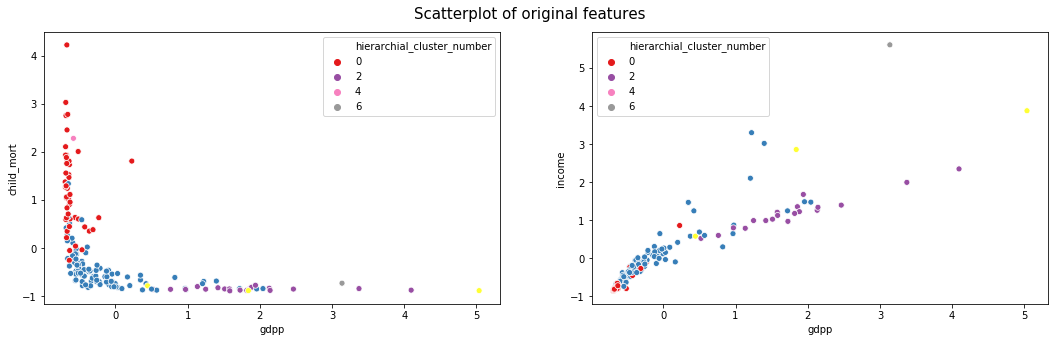

In [57]:
col=['child_mort','income']
plt.figure(figsize=(18,5))
j=1
for i in col:
    plt.subplot(1,2,j)
    sns.scatterplot(df_scaled['gdpp'],df_scaled[i],hue=df_scaled['hierarchial_cluster_number'],palette="Set1")
    j+=1
plt.suptitle("Scatterplot of original features",y=0.95,fontsize=15)

Text(0.5, 0.95, 'Scatterplot of original features')

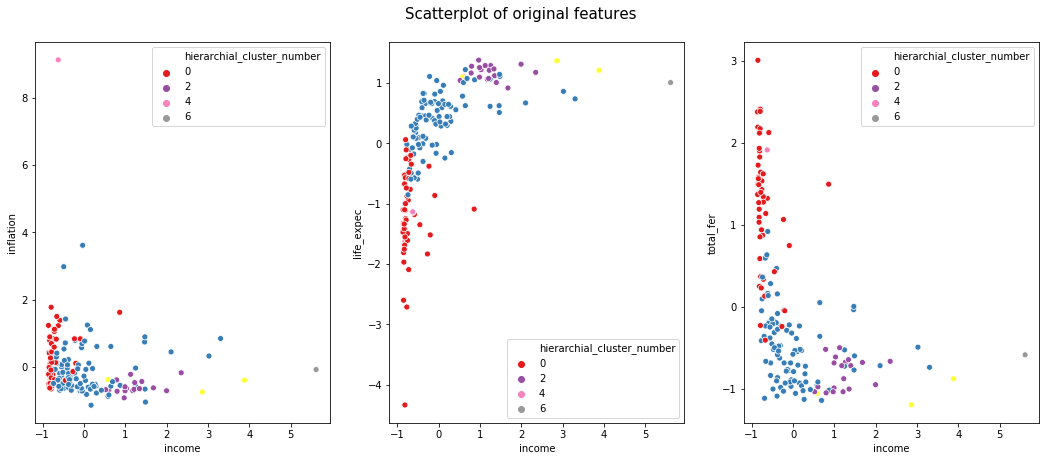

In [58]:
c=['inflation','life_expec', 'total_fer']
plt.figure(figsize=(18,7))
j=1
for i in c:
    plt.subplot(1,3,j)
    sns.scatterplot(df_scaled['income'],df_scaled[i],hue=df_scaled['hierarchial_cluster_number'],palette="Set1")
    j+=1
plt.suptitle("Scatterplot of original features",y=0.95,fontsize=15)

In [59]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_number,hierarchial_cluster_number
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1


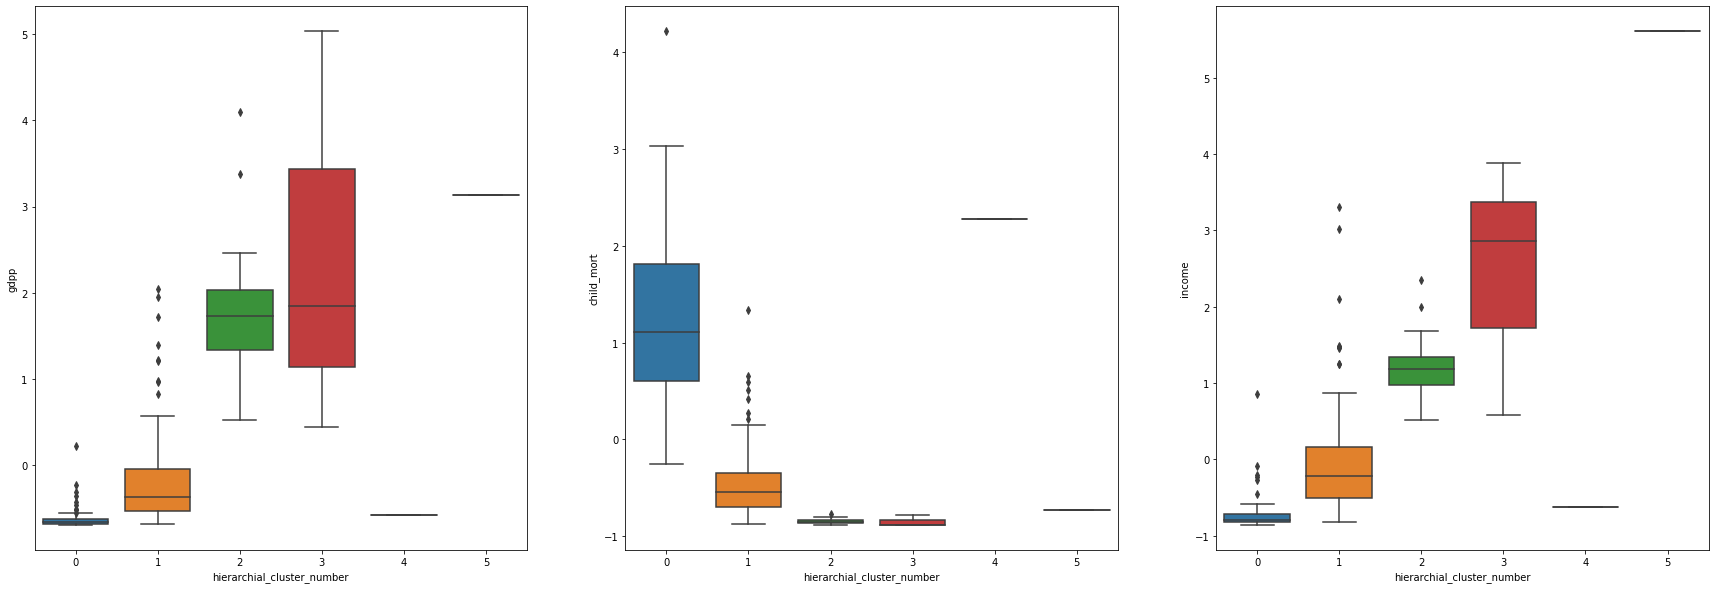

In [60]:
col=['gdpp','child_mort','income']
plt.figure(figsize=(30,10))
j=1
for i in col:
    plt.subplot(1,3,j)
    sns.boxplot(y=df_scaled[i],x=df_scaled['hierarchial_cluster_number'])
    j=j+1

<p style="font-family: Arial; font-size:1.0em;color:blue;"> From the above boxplots, we can say that for the clusters 0 and 4, the child mortality is high, gdp is low and the net income is low which is the ideal conidtion for the countries that are in dire need for devolopment

In [61]:
len(list(df['country'][(df['hierarchial_cluster_number']==0)])) #number of countries where the hierarchial cluster number is 0

49

In [62]:
len(list(df['country'][(df['hierarchial_cluster_number']==4)])) #number of countries where the hierarchial cluster number is 4

1

<p style="font-family: Arial; font-size:1.0em;color:blue;"> We observed that the nummber of countries in cluster 0 are 49 and there is only one country in cluster 4.<br>So, apart from the country in cluster 4,we will  concentrate on the countries in cluster 0 to target the ccountries  which are in need of help!

### FINAL ANALYSIS

In [63]:
len(list(df['country'][(df['kmeans_cluster_number']==1)])) # number of countries in cluster 1 based on k means clustering

47

In [64]:
len(list(df['country'][(df['kmeans_cluster_number']==4)])) # number of countries in cluster 4 based on k means clustering

1

In [65]:
df_kmeans_cluster1=df[(df['kmeans_cluster_number']==1)]

In [66]:
df_hierarchial_cluster0=df[(df['hierarchial_cluster_number']==0)]

In [67]:
len(list(df['country'][(df['hierarchial_cluster_number']==0)])) # number of countries in cluster 0 based on hierarchial cluster number

49

In [68]:
len(list(df['country'][(df['hierarchial_cluster_number']==4)])) # number of countries in cluster 4 based on hierarchial cluster number

1

In [69]:
df_kmeans_cluster1.head(15)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_number,hierarchial_cluster_number
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1,0
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1,0
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,1,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1,0
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1,0
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1,0
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1,0


In [70]:
df_kmeans_cluster1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_number,hierarchial_cluster_number
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.0,47.000000
mean,91.565957,28.615298,6.322553,41.954594,3911.978723,9.956702,59.321277,4.935106,1893.829787,1.0,0.063830
std,33.163641,18.642083,2.732857,18.428966,5638.991578,7.268299,6.536285,1.100332,2958.561345,0.0,0.247092
min,36.900000,0.109000,1.970000,0.065900,609.000000,0.885000,32.100000,2.410000,231.000000,1.0,0.000000
25%,63.800000,16.650000,4.495000,29.800000,1390.000000,4.010000,56.650000,4.440000,550.000000,1.0,0.000000
50%,89.300000,23.800000,5.660000,40.300000,1870.000000,8.790000,59.500000,5.050000,897.000000,1.0,0.000000
75%,111.000000,38.200000,8.105000,49.450000,3545.000000,16.350000,63.350000,5.495000,1385.000000,1.0,0.000000
max,208.000000,85.800000,13.100000,101.000000,33700.000000,26.500000,71.100000,7.490000,17100.000000,1.0,1.000000


In [71]:
df[['gdpp','income','child_mort','country']][df['kmeans_cluster_number']==1] #list of countries with kmeans cluster 1

,gdpp,income,child_mort,country
0,553,1610,90.2,Afghanistan
3,3530,5900,119.0,Angola
17,758,1820,111.0,Benin
21,6350,13300,52.5,Botswana
25,575,1430,116.0,Burkina Faso
26,231,764,93.6,Burundi
28,1310,2660,108.0,Cameroon
31,446,888,149.0,Central African Republic
32,897,1930,150.0,Chad
36,769,1410,88.2,Comoros


In [72]:
df_scaled[['gdpp','income','child_mort']]

,gdpp,income,child_mort
0,-0.679180,-0.808245,1.291532
1,-0.485623,-0.375369,-0.538949
2,-0.465376,-0.220844,-0.272833
3,-0.516268,-0.585043,2.007808
4,-0.041817,0.101732,-0.695634
...,...,...,...
162,-0.546913,-0.738527,-0.225578
163,0.029323,-0.033542,-0.526514
164,-0.637754,-0.658404,-0.372315
165,-0.637754,-0.658924,0.448417


<p style="font-family: Arial; font-size:1.0em;color:blue;"> Now, we concentrate on the countries where the  GDP is low, income is low and the child mortality is high. So, we find the countries which are GDP is less than the 30th percentile,  Income is less than the 30th percentile  and the child mortality Rate is greater than the 75th percentile.

In [73]:
df_kmeans_cluster1[(df_kmeans_cluster1['child_mort']>df_kmeans_cluster1['child_mort'].quantile(0.75))&(df_kmeans_cluster1['income']<df_kmeans_cluster1['income'].quantile(0.30))&(df_kmeans_cluster1['gdpp']<df_kmeans_cluster1['gdpp'].quantile(0.30))]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_number,hierarchial_cluster_number
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,1,0
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,1,0
64,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.97,55.6,5.05,547,1,0
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,1,0
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,1,0


<p style="font-family: Arial; font-size:1.0em;color:blue;"> By performing the above operation, we got the Central African Republic, Congo, niger and Sierra Leone countries.<br>Apart from these 5 countries, from Cluster 4, we also got Nigeria as the country which is in dire need of help. 

<p style="font-family: Arial; font-size:1.0em;color:blue;">As a Data Analyst, I suggest the HELP Organization to provide the necessary help for the below countries:<br>1.Central African Republic<br> 2. Congo, Dem. Rep.<br>3. Guinea-Bissau<br>4. Niger	<br>5. Sierra Leone	<br>6. Nigeria

In [74]:
df_hierarchial_cluster0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_number,hierarchial_cluster_number
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1,0
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,1,0
21,Botswana,52.5,43.6,8.30,51.3,13300,8.920,57.1,2.88,6350,1,0
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,1,0


In [75]:
df_hierarchial_cluster0.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_number,hierarchial_cluster_number
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.0
mean,87.667347,29.704082,6.737143,45.200000,3834.755102,10.063980,59.757143,4.841633,1905.306122,0.897959,0.0
std,35.662751,17.873066,2.716925,18.285388,5530.154370,7.275785,6.735076,1.158635,2900.019649,0.305839,0.0
min,28.100000,2.200000,2.460000,17.200000,609.000000,0.885000,32.100000,2.340000,231.000000,0.000000,0.0
25%,62.600000,17.100000,4.930000,33.600000,1390.000000,3.870000,56.800000,4.240000,562.000000,1.000000,0.0
50%,83.100000,23.800000,5.890000,42.900000,1930.000000,8.790000,60.100000,5.020000,897.000000,1.000000,0.0
75%,111.000000,39.400000,8.410000,51.700000,3340.000000,16.500000,64.000000,5.430000,1460.000000,1.000000,0.0
max,208.000000,85.800000,14.200000,101.000000,33700.000000,26.500000,71.100000,7.490000,17100.000000,1.000000,0.0


In [76]:
df_hierarchial_cluster0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 166
Data columns (total 12 columns):
country                       49 non-null object
child_mort                    49 non-null float64
exports                       49 non-null float64
health                        49 non-null float64
imports                       49 non-null float64
income                        49 non-null int64
inflation                     49 non-null float64
life_expec                    49 non-null float64
total_fer                     49 non-null float64
gdpp                          49 non-null int64
kmeans_cluster_number         49 non-null int32
hierarchial_cluster_number    49 non-null int32
dtypes: float64(7), int32(2), int64(2), object(1)
memory usage: 4.6+ KB


In [77]:
df_hierarchial_cluster0[(df_hierarchial_cluster0['child_mort']>df_hierarchial_cluster0['child_mort'].quantile(0.75))&(df_hierarchial_cluster0['income']<df_hierarchial_cluster0['income'].quantile(0.30))&(df_hierarchial_cluster0['gdpp']<df_hierarchial_cluster0['gdpp'].quantile(0.30))]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_number,hierarchial_cluster_number
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575,1,0
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,1,0
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,1,0
64,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.97,55.6,5.05,547,1,0
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,1,0
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,1,0


<p style="font-family: Arial; font-size:1.0em;color:blue;"> By performing the above operation, we got the Central African Republic, Congo, niger, Guinea-Bissau, Burkina Faso and Sierra Leone countries.<br>Apart from these 4 countries, from Cluster 6, we also got Nigeria as the country which is in dire need of help.

<p style="font-family: Arial; font-size:1.0em;color:blue;">As a Data Analyst, I suggest the HELP Organization to provide the necessary help for the below countries:<br>1. Burkina Faso<br>2. Central African Republic<br> 3. Congo, Dem. Rep.<br>4. Guinea-Bissau<br>5. Niger	<br>6. Sierra Leone	<br>7. Nigeria

<p style="font-family: Arial; font-size:1.0em;color:blue;">From the above modelling, we  can consider any one model and provide the solutions. Generally, the results might not be the same for the types of clustering. But as the visualizations are better and the clusters are well seperated in Kmeans clustering rather than the hierarcchial clustering, as a Data Analyst I will suggest the HELP organization with the reulsts I've received in K means Clustering. However countries are also predicted by the Hierarchial clustering. This makes the result even more stronger.

<p style="font-family: Arial; font-size:1.0em;color:blue;">1. Nigeria<br>2. Central African Republic<br> 3. Congo, Dem. Rep.<br>4. Guinea-Bissau<br>5. Niger	<br>6. Sierra Leone